# **TP Wavelets**

In this TP, we will work on some fundamental concepts in Wavelets and compression of images.

First we'll briefly check the limitations of the Fourier transform. We'll then check some fundamental properties of a family of Wavelets and compute the Wavelet transform of a very simple signal. In the second part of the TP, we will use the DWT to compress and image.

Make sure to sequentially run all the cells in each section, so that the intermediate variables / packages will carry over to the next cell

We recommend you save a copy of this colab in your drive so you don't lose progress!

**Note 1:** As mentioned in the course and since there's not any policy regarding ChatGPT at Télécom level yet, you can use it. However, using ChatGPT without understanding their outputs is not OK, and will be penalized accordingly in your grade. Please be sure of all the functions you'll use.

**Note 2:** Several points have associated questions. When answering these questions, all responses should be properly justified. ChatGPT answers are very easy to spot.

**Note 3:** Always plot the functions and outputs you're generating. If the output or function is not properly plotted/shown, this will reduce points in your grade.

# Setup
First, we install PyWavelets

In [2]:
!pip install PyWavelets


[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pywt

pywt.__version__

'1.4.1'

# Important
Google Colab is an interesting tool to try things out quickly. However, Google Colab and more general Notebooks are not meant to be an Integrated Development Environment (IDE). For a real job, please use an actual IDE like PyCharm or VS Code.

# Limitation of the Fourier Transform
*   Create a sinusoidal signal of 2.5 seconds of duration.
*   Set up a sampling rate of 20kHz. The signal should be divided in 5 parts of 0.5 seconds of duration each.
*  The signal should have the following frequencies in this order {10 Hz, 30 Hz, 60 Hz, 30 Hz, 10 Hz}.

In [4]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
N= int(2.5 * 20000)
T=np.linspace(0,N/20000,N)
pas = int(0.5 * 20000)
Fs= 20000
signal1 =np.sin(2*np.pi*10*T[0:pas])
signal2 =np.sin(2*np.pi*30*T[pas:2*pas])
signal3 =np.sin(2*np.pi*60*T[2*pas:3*pas])
signal4 =np.sin(2*np.pi*30*T[3*pas:4*pas])
signal5 =np.sin(2*np.pi*10*T[4*pas:5*pas])
signal = np.concatenate([signal1,signal2,signal3,signal4,signal5])




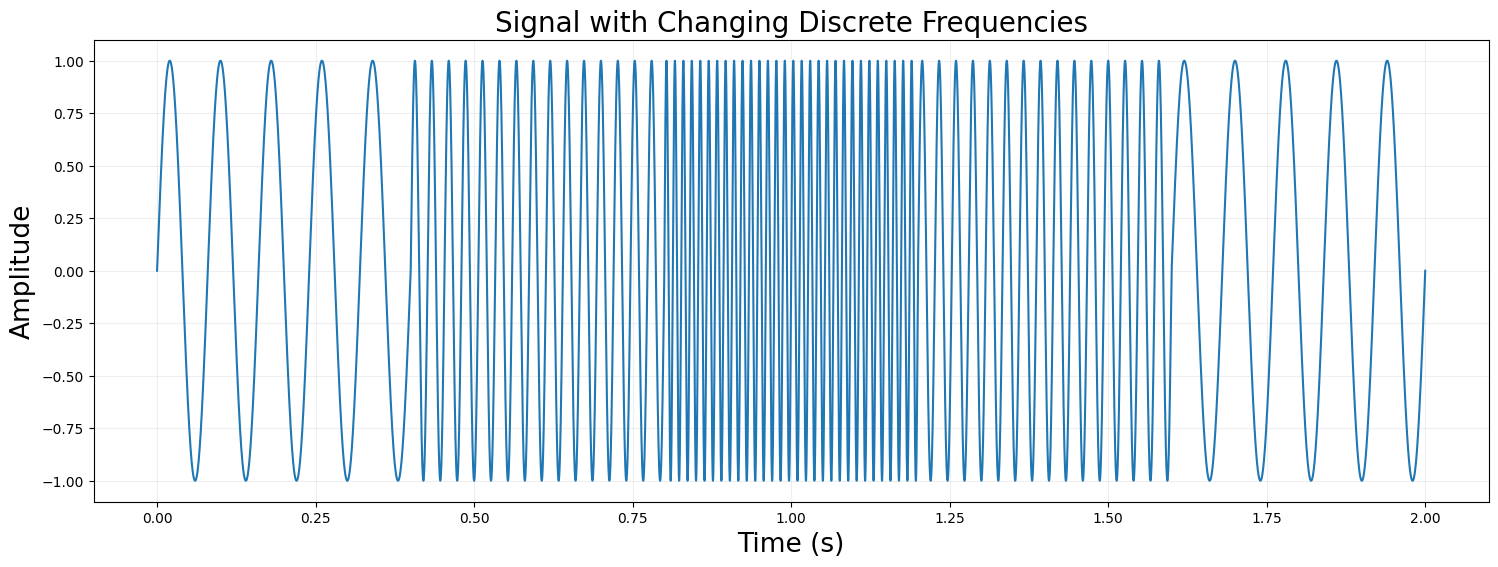

In [5]:


font_size = 20

plt.figure(figsize=(18, 6))
time=np.linspace(0,int(len(signal)/20000),len(signal))
plt.plot(time, signal, linewidth=1.5)
plt.title('Signal with Changing Discrete Frequencies', fontsize=font_size)
plt.xlabel('Time (s)', fontsize=font_size-1)
plt.ylabel('Amplitude', fontsize=font_size-1)
plt.grid(alpha=0.2)

Now, you should compute the Discrete Fourier Transform of the signal. You can use any library from Python you prefer. You might need to cut the x-axis in the Fourier transform up to 100 Hz in the visualization. Please check https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html and https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


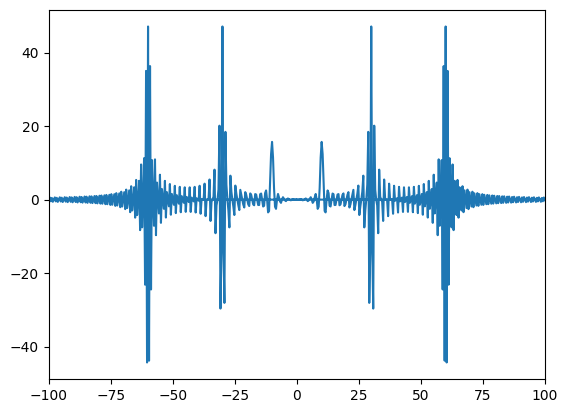

In [6]:
# Your code here
spectre=np.fft.fft(signal)
freq=np.fft.fftfreq(signal.size,d=1/20000)

plt.xlim(-100,100)

plt.plot(freq,spectre)
plt.show()

**QUESTIONS**

1) Does the established sampling rate satisfy the Nyquist-Shannon sampling theorem to avoid aliasing? Please justify.

2) What can you say from the signal looking **only** at the Fourier transform?

3) Can you be certain about the location of some frequency component in the time domain? Why?

**YOUR ANSWERS HERE:**

1) Fs= 20000Hz > 2*Fmax_signal = 2x60 =120 so yes it is satisfied.

2) The Fourier transform is symmetric so the signal is real.

3) We are not certain  about the location of the frequency components because there are two parts of the signal which are at the same frequency 10Hz and two other parts at the same frequency 30 Hz and the Fourier transform doesn't give us any idea about the time.

# **Mother Wavelet**
As we saw in the course, a wavelet is not just a function but a whole family of functions that satisfy certain requirements. In this part of the TP we're gonna work with the Morlet wavelet defined as follows: $\Psi(t)=k e^{iw_0t}e^{-\frac{1}{2}(\frac{t}{\sigma})^2}$. Please generate a Morlet wavelet in Python **WITHOUT using PyWavelets** with the following parameters:

-Center frequency of the wavelet = 10 Hz

-Sampling rate $\eta$ = 20000 Hz

-$k=\frac{1}{\sqrt{\eta}}$

-$\sigma = 0.1$

You can generate the wavelet between -1 and 1 seconds, so the time duration of the wavelet is 2 seconds. For this part, you just need to generate the real part of the wavelet.

Text(0, 0.5, 'Amplitude')

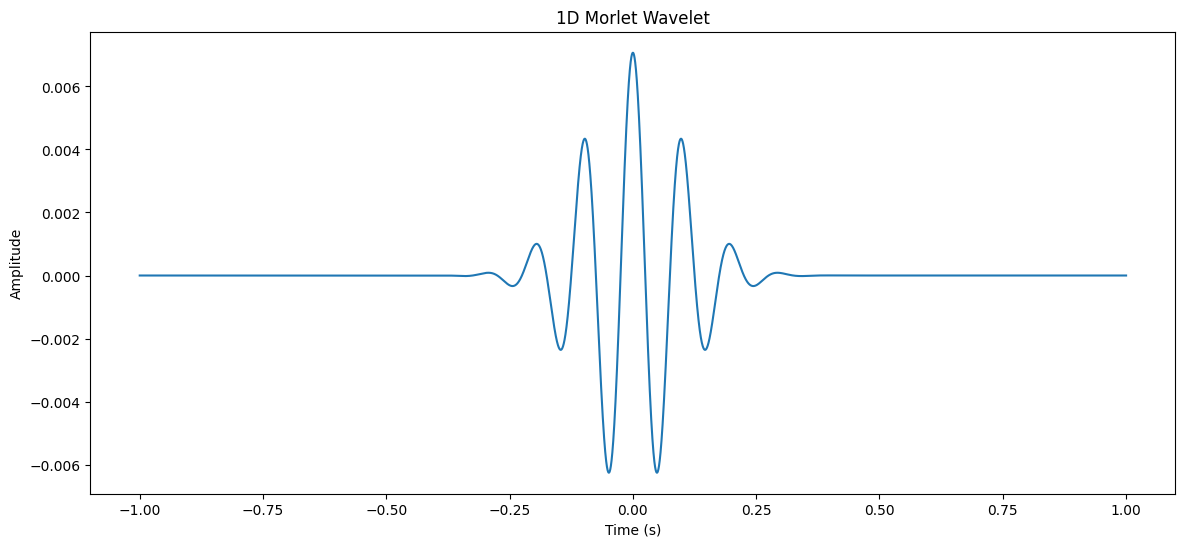

In [7]:
# Your code here
import cmath
i=complex(0,1)
Fs=20000
sigma=0.1
duration_seconds=2
N= Fs *duration_seconds
time = np.linspace(-1, 1,N)
time_square= np.multiply(time,time)
k=1/np.sqrt(Fs)
morlet= k*np.exp(i*(2*np.pi*10)*time-(1/(2*sigma**2))*time_square)

# Plot the real part of the Morlet wavelet in 1D
plt.figure(figsize=(14, 6))

plt.plot(time,morlet)
plt.title('1D Morlet Wavelet')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Please show that the mother wavelet we just created satisfies the admissibility and the finite energy conditions:

In [8]:
# Your code here
print("The mean is ",np.trapz(morlet.real)) #mean
print("The energy is ",np.trapz(np.absolute(morlet)**2))# energy

The mean is  9.483412197067633e-08
The energy is  0.17724095395592435


The mean is nearly equal to 0 so it satisfies the admissibility condition.
The energy is finite. 

**Note:** In real life, you have to deal with finite-precision related problems. Therefore, if for the admissibility condition you don't have exactly the value you were expecting for, don't worry.

# **Convolution**

As we saw in the course, we need a measure of similarity to compute the wavelet transform. We also saw that we can easily compute the shift in time and similarity calculation with the 1-D convolutions.

* Generate a chirp sinusoidal signal from -5 to 5 seconds with an initial frequency of 5 Hz and final frequency of 15 Hz and sampling rate of 20kHz:

Text(0.5, 0, 'Time')

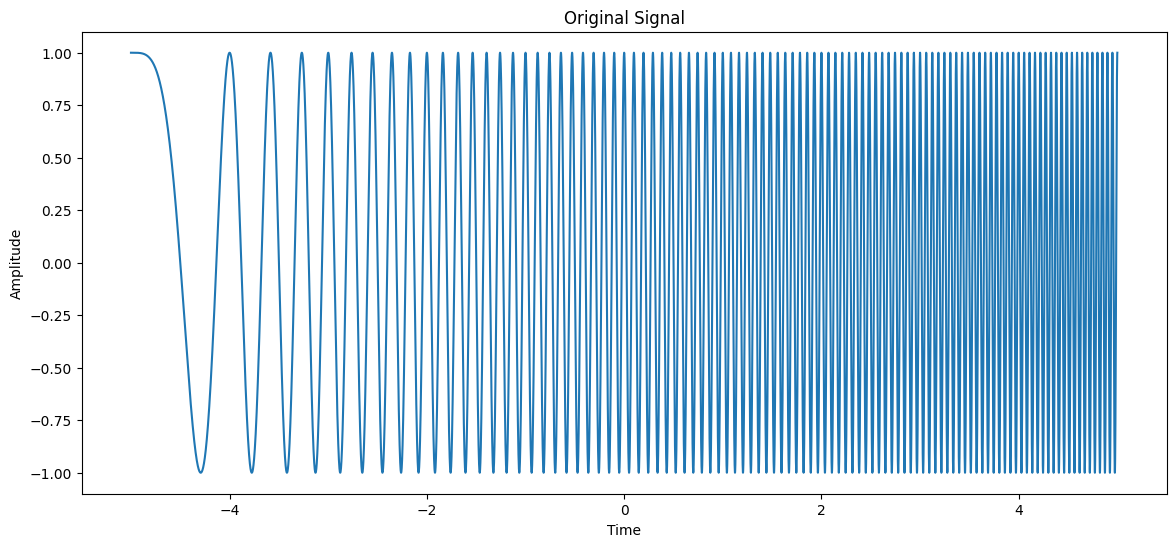

In [9]:
# Your code here
from scipy.signal import chirp
duration_seconds = 10
Fs=20000
N= duration_seconds*Fs
time_signal = np.linspace(-5,5,N)
fr= time_signal+10
signal = np.cos(2*np.pi*fr*time_signal)

plt.figure(figsize=(14, 6))
plt.plot(time_signal, signal)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')

Now create a Morlet wavelet with the following parameters:

* Center frequency of the wavelet = 10 Hz

* Sampling rate $\eta$ = 20000 Hz

* $k=\frac{1}{\sqrt{\eta}}$
* $\sigma = 0.2$

(-1.0, 1.0)

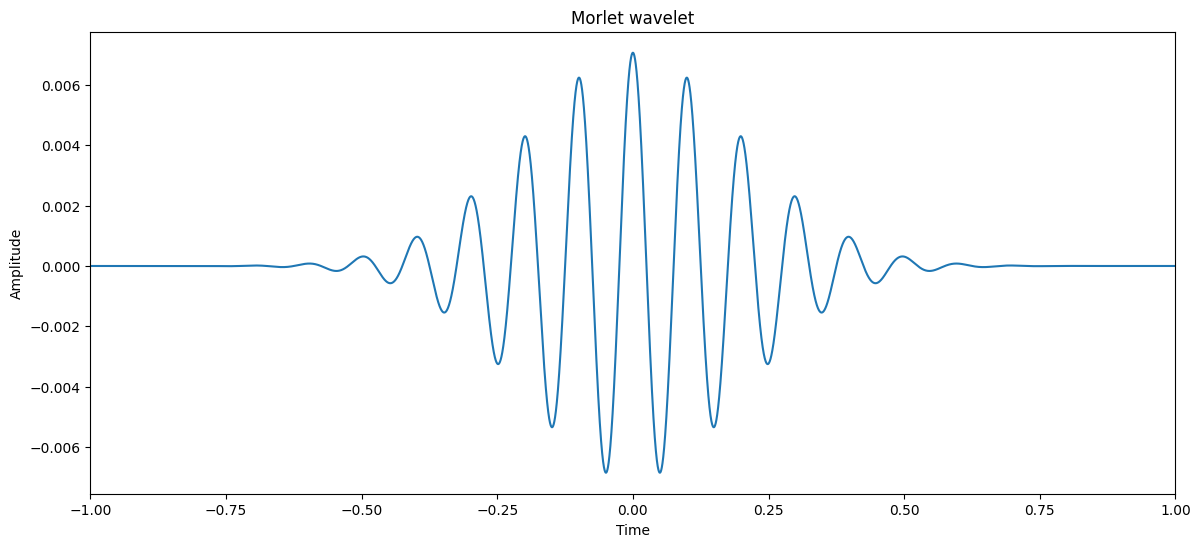

In [10]:
# Your code here
sigma=0.2
time=np.linspace(-5,5,N)
time_square=np.multiply(time,time)
morlet_wavelet= k*np.exp(i*(2*np.pi*10)*time-(1/(2*sigma**2))*time_square)

plt.figure(figsize=(14, 6))
plt.plot(time, np.real(morlet_wavelet))
plt.title('Morlet wavelet')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim(-1,1)

Compute the convolution between the signal and $Re(\Psi(t))$. For reference on how to perform convolution with scipy 'convolve' function, please check https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

Text(0, 0.5, 'Amplitude')

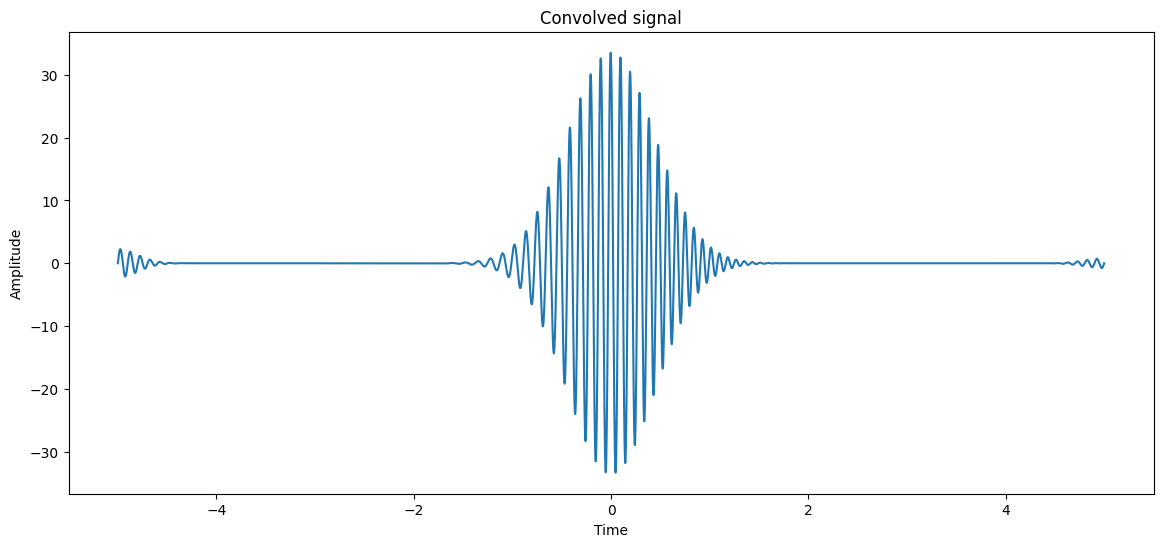

In [11]:
# Your code here
import scipy.signal
convolved_signal = scipy.signal.convolve(signal,morlet_wavelet.real,mode='same')

plt.figure(figsize=(14, 6))
plt.plot(time_signal, convolved_signal)
plt.title('Convolved signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

There are some points where the convolution is zero, even in regions of high similarity between the wavelet and the signal. **Is this OK?** If it's not, propose a solution to that.

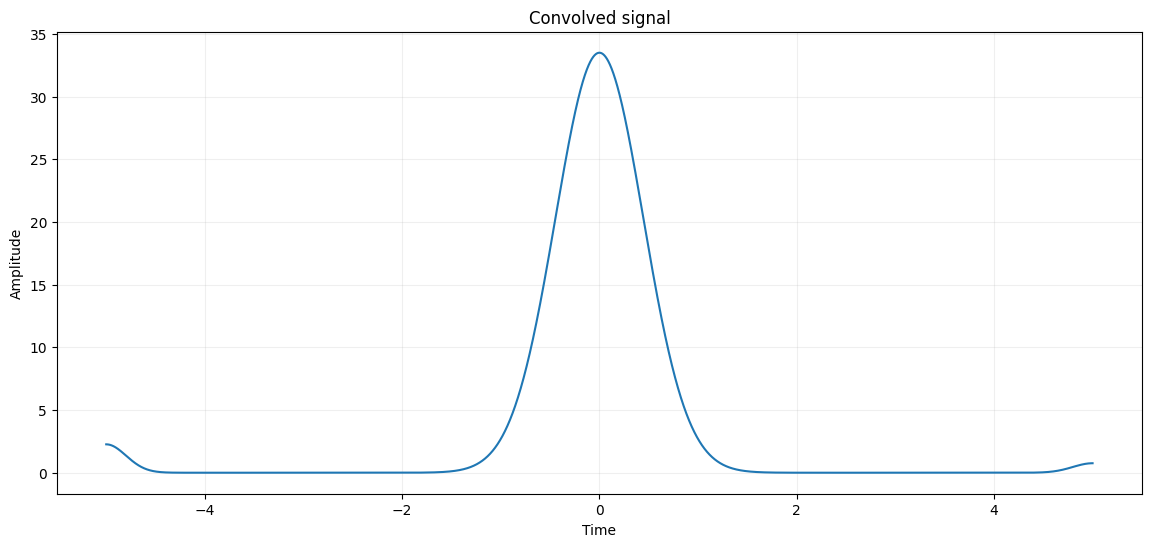

In [12]:
# Your code here
import scipy.signal 
convolved_signalC = scipy.signal.convolve(signal,morlet_wavelet,mode='same')

plt.figure(figsize=(14, 6))
plt.plot(time_signal,np.absolute(convolved_signalC))
plt.title('Convolved signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(alpha=0.2)

# **Image Compression**
For this part, we'll use the Discrete Wavelet Transform (DWT) implemented as a filter bank to do image compression. The first step is to have an image to compress. For doing so you can use the following piece of code to download an image of Trudy.

In [13]:
!wget https://raw.githubusercontent.com/jhonygiraldo/jhonygiraldo.github.io/main/Trudy_for_compression.jpeg

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


**Visualize image:** With the following code you can visualize the image. If you're using Google Collab, most probably you already have the open cv library installed. If you're using Jupyter Notebook for example, you'll have to install open cv if it's not already installed.

In [14]:
# Let us define a function for visualizing images
def show_image(image, title='Input Image', font_size=12,fig_size = (10, 10)):
  #A function that uses matplotlib to show grayscale images
  plt.figure(figsize=fig_size)
  plt.imshow(image, cmap='gray')
  plt.title(title, fontsize=font_size)
  plt.axis('off')

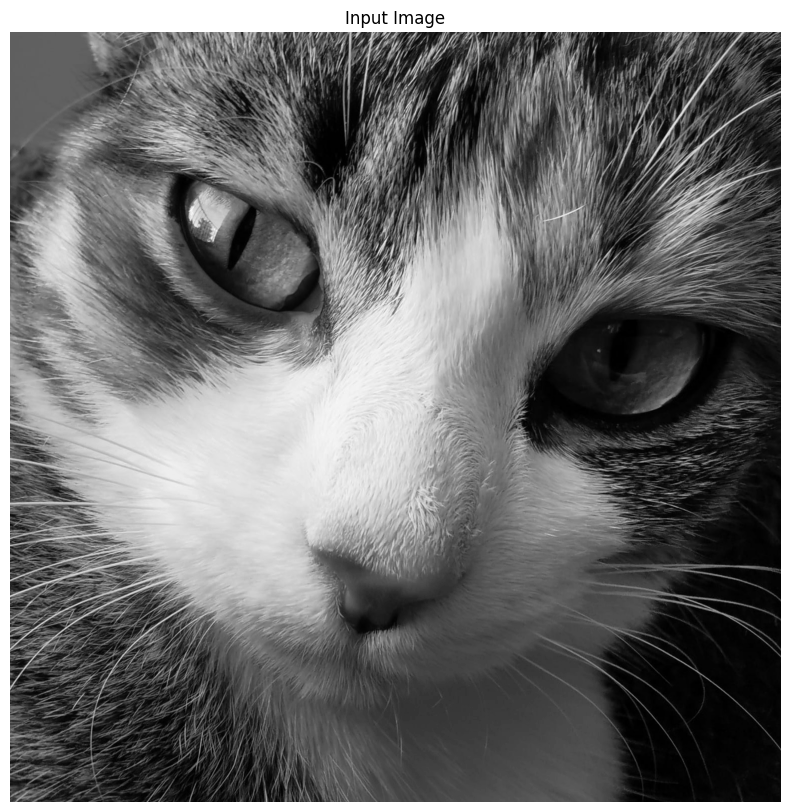

In [15]:
import cv2

# Load your image as a grayscale
input_image = cv2.imread('Trudy_for_compression.jpeg', cv2.IMREAD_GRAYSCALE)
# Display the original image
show_image(input_image, 'Input Image')



If you use some wavelet function (Biorthogonal 1.3 in this case), the 1-level 2D wavelet decomposition of our input image is given as follows:

In [16]:
# # You can see a list of wavelet families
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [17]:
# For each family, you can list the available wavelets
pywt.wavelist(family='bior', kind='all')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8']

<img src="output.png"
     alt="wavelet coefficients"
     style="float: left; margin-right: 10px;" />

In the previous image we applied a threshold in the wavelet coefficients for visualization purposes. **Please explain the meaning of each of these 4 images**.

**YOUR ANSWER HERE:**
The image in upper left is the result of a low pass filter.
The image in upper right is the result of a high pass horizontal filter.
The image in bottom left is the result of a high pass vertical filter.
The image in bottom right is the result of a high pass diagonal filter.


Now, you should compute the six-levels 2D wavelet decomposition of the input image with a Daubechies wavelet with six vanishing moments using the PyWavelet library. Please check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2

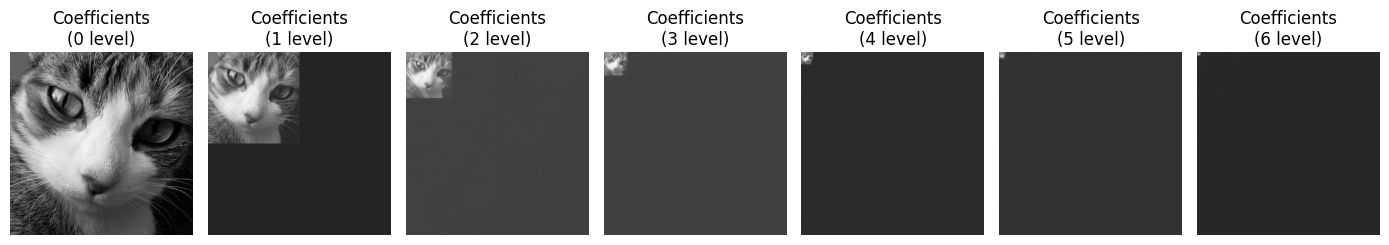

In [18]:
# Your code here
fig, axes = plt.subplots(1, 7, figsize=[14, 8])
for level in range(7):
    coeffs = pywt.wavedec2(input_image,'db6',level=level)

    # show the normalized coefficients
    coef_arr, slices = pywt.coeffs_to_array(coeffs)
    axes[level].imshow(coef_arr, cmap=plt.cm.gray)
    axes[level].set_title('Coefficients\n({} level)'.format(level))
    axes[level].set_axis_off()
    

plt.tight_layout()
plt.show()




* Set a threshold of value of 100 and take to zero the values less than that in the 2D wavelet decomposition. **Note:** You should only threshold the outputs of the high-pass filters.



In [19]:
# Your code here
threshold=100

coeffs = pywt.wavedec2(input_image,'db6',level=6,mode='symmetric')
comp_coef =[]
comp_coef.append(coeffs[0])
for i in range(1,7):
    comp=[]
    for c in coeffs[i]:
        
        comp.append(np.where(abs(c)>threshold, c, 0))
    comp_coef.append(tuple(comp))



 


* Compute the IDWT to reconstruct the image after the "compression". Check https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-reconstruction-using-waverec2 as a reference.

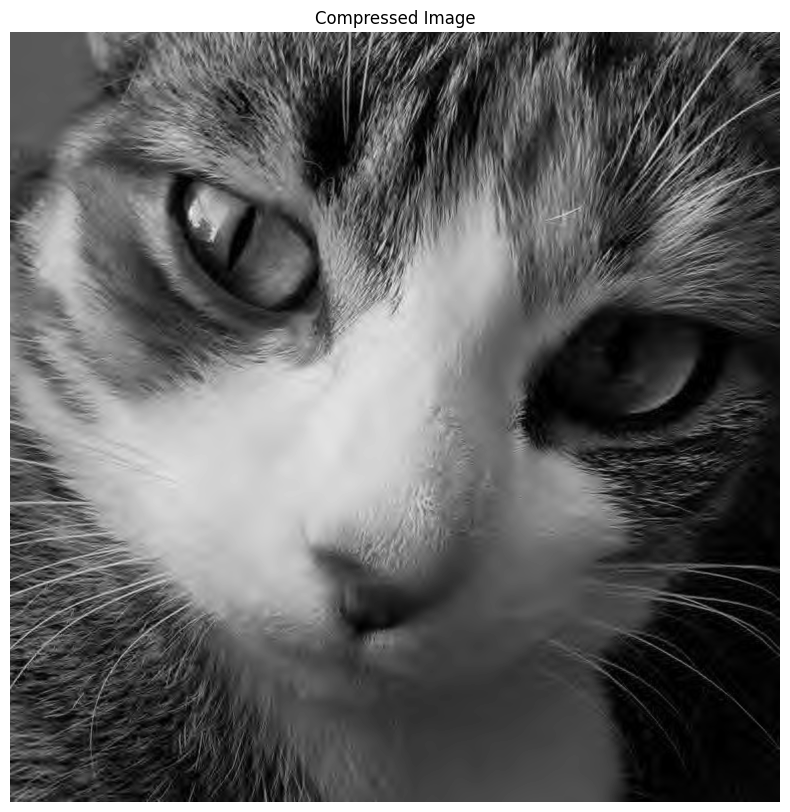

In [20]:
# Your code here
compressed_image= pywt.waverec2(comp_coef, 'db6')

compressed_image = compressed_image.astype(int)


#plot compressed image
show_image(np.absolute(compressed_image), 'Compressed Image')


What's the compression ratio?

In [21]:
import os
cv2.imwrite("TrudyCompressed.jpeg",compressed_image,[int(cv2.IMWRITE_JPEG_QUALITY), 80])#I save the compressed image as a jpeg file
cv2.imwrite("Trudy_for_CompressionGray.jpeg",input_image,[int(cv2.IMWRITE_JPEG_QUALITY),80])# I save the input_image as a jpeg file


original_size = os.path.getsize("Trudy_for_compressionGray.jpeg")
  
final_size = os.path.getsize("TrudyCompressed.jpeg")

ratio = (final_size)/(original_size)
print("The compression ration is ",ratio*100,"%.")


The compression ration is  61.39357581579781 %.


# **Putting everything together**

In this exercise we'll analyze the Peak Signal to Noise Ration (PSNR) of the compressed images for different thresholds. For doing so, we'll give you the function to compute the PSNR between the original and compressed image.

In [22]:
def psnr(original_image, compressed_image):
    h,w = original_image.shape
    mse = np.sum(np.abs(original_image-compressed_image)**2)/(h*w)
    return 20* np.log10(255**2/mse)

Now, you have to create a function codec that receives the input image, the wavelet to be used, the number of levels, and the threshold value. This function returns the compressed image and the compression ratio. **Note:** You already did that previously.

In [23]:
def codec(input_image,wavelet='db4',num_levels=6,threshold=100):
   coeffs = pywt.wavedec2(input_image,wavelet,level=num_levels)
   comp_coef =[]
   comp_coef.append(coeffs[0])
   for i in range(1,num_levels+1):
      comp=[]
      for c in coeffs[i]:
         comp.append(np.where(abs(c)>threshold, c, 0))
      comp_coef.append(tuple(comp))

   compressed_image= pywt.waverec2(comp_coef, wavelet)
   compressed_image = compressed_image.astype(int)

   comp_image_name = "TrudyCompressed"+str(num_levels)+wavelet+"thres"+str(threshold)+".jpeg"

   cv2.imwrite(comp_image_name,compressed_image,[int(cv2.IMWRITE_JPEG_QUALITY),80])
   original_size = os.path.getsize("Trudy_for_compressionGray.jpeg")
   
   final_size = os.path.getsize(comp_image_name)
   ratio = (final_size)/(original_size)
   return compressed_image, ratio


      


Now, we compare the performance of the 'db4' and the 'bior1.3' wavelets in terms of compression ratio and PSNR for different thresholds.

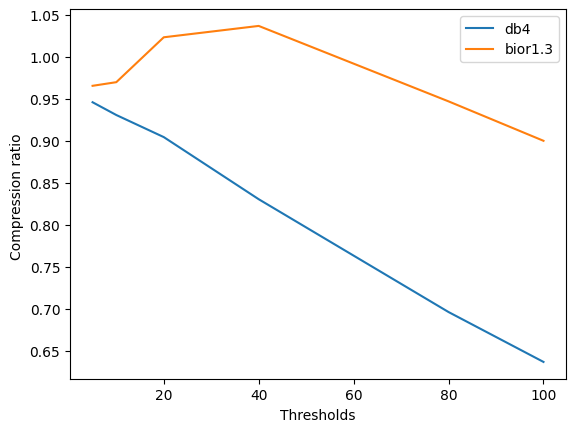

In [24]:
wavelet_1 = 'db4'
wavelet_2 = 'bior1.3'
thresholds = [5,10,20,40,80,100]
num_levels=6

# Your code here
rats1=[]
psnrs1=[]
rats2=[]
psnrs2=[]
for threshold in thresholds:
    imag1, rat1 =codec(input_image,wavelet_1,6,threshold)
    psnr1= psnr(input_image,imag1[:-1,:]) # because original image has a shape of (1531,1532) and compressed image has a shape of (1532,1532)
    psnrs1.append(psnr1)
    rats1.append(rat1)
    imag2, rat2 =codec(input_image,wavelet_2,6,threshold)
    psnr2= psnr(input_image,imag2[:-1,:])
    rats2.append(rat2)
    psnrs2.append(psnr2)
plt.plot(thresholds,rats1,label='db4')

plt.plot(thresholds,rats2,label='bior1.3')

plt.ylabel("Compression ratio ")
plt.xlabel("Thresholds")
plt.legend()


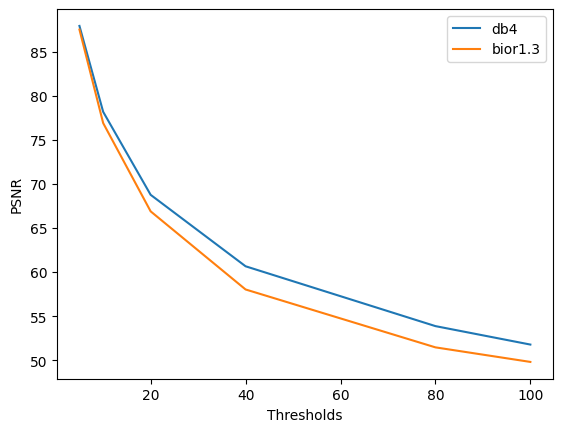

In [25]:
plt.xlabel("Thresholds")
plt.ylabel("PSNR")
plt.plot(thresholds,psnrs1,label='db4')
plt.plot(thresholds,psnrs2,label='bior1.3')
plt.legend()

**QUESTIONS**

1) Which wavelet is better for the Trudy_for_compression.jpeg image and why?  

db4 wavelet is better because for a fixed threshold it has bigger PSNR and smaller compression ratio.
